In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)

100%|████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:12<00:00, 2.15MB/s]
100%|█████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 114kB/s]
100%|█████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:04<00:00, 979kB/s]
100%|████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 11.0MB/s]


In [ ]:
# Fast CNN Architecture
class FastCNN(nn.Module):
    def __init__(self):
        super(FastCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2),             

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),             

            nn.Flatten(),                   
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)

In [6]:
model = FastCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Training loop
def train(model, loader, optimizer, criterion, epoch):
    model.train()
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}: Training loss: {total_loss / len(loader):.4f}")

# Evaluation function
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [9]:
for epoch in range(5):
    train(model, train_loader, optimizer, criterion, epoch)
    test(model, test_loader)

Epoch 1: Training loss: 0.4586
Test Accuracy: 87.64%
Epoch 2: Training loss: 0.2962
Test Accuracy: 89.54%
Epoch 3: Training loss: 0.2466
Test Accuracy: 90.31%
Epoch 4: Training loss: 0.2155
Test Accuracy: 90.43%
Epoch 5: Training loss: 0.1916
Test Accuracy: 90.86%


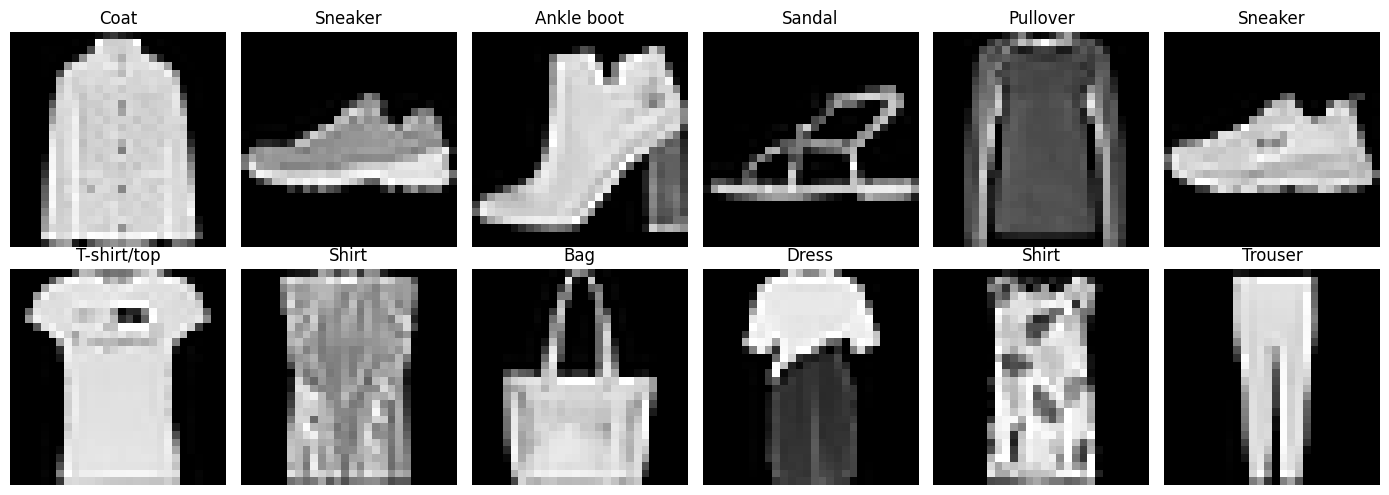

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels for FashionMNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to visualize a few images
def show_images(images, labels):
    images = images.numpy()
    fig, axes = plt.subplots(2, 6, figsize=(14, 5))
    for i in range(12):
        ax = axes[i // 6][i % 6]
        ax.imshow(np.squeeze(images[i]), cmap='gray')
        ax.set_title(classes[labels[i]])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Load one batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show the first 12 images
show_images(images[:12], labels[:12])
